# Lecture 11: VC Dimension
***

<img src="figs/cogs.jpg" width=1100 height=50>

**Reminder**: *If the math type-setting looks funny, scroll down and shift-enter the single sell under Helper Functions*


<br>
<br>



### Problem 1: VC Dimension of Hyperplanes Through the Origin 
***

Consider the class of linear hyperplanes in the first quadrant of $\mathbb{R}^2$ that pass through the origin where each hypothesis can be defined to classify points above/left or below/right of the hyperplane as positive. 

<img src="figs/planes2.png" width=800 height=50>

**Q**: State and prove the VC Dimension of this hypothesis class. 




**A**: The VC Dimension of this hypothesis class is $\textrm{VCdim}(H) = 2$.  We start by showing that we can shatter a configuration of two points. 

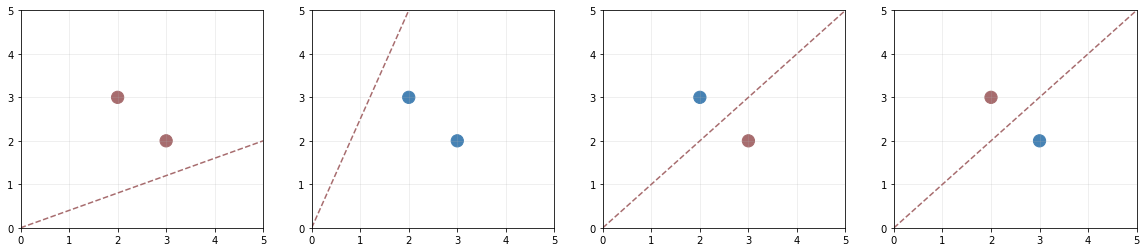

In [13]:
import matplotlib.pylab as plt
%matplotlib inline

mycolors = {"blue":"steelblue", "red":"#a76c6e",  "green":"#6a9373", "smoke":"#f2f2f2"}
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
axes[0].scatter([3,2], [2,3], color=[mycolors["red"], mycolors["red"]], s=150)
axes[0].plot([0,5], [0,2], color=mycolors["red"], ls="--")
axes[0].set_xlim([0,5]); axes[0].set_ylim([0,5]); axes[0].grid(alpha=0.25)
axes[1].scatter([3,2], [2,3], color=[mycolors["blue"], mycolors["blue"]], s=150)
axes[1].plot([0,2], [0,5], color=mycolors["red"], ls="--")
axes[1].set_xlim([0,5]); axes[1].set_ylim([0,5]); axes[1].grid(alpha=0.25)
axes[2].scatter([3,2], [2,3], color=[mycolors["red"], mycolors["blue"]], s=150)
axes[2].plot([0,5], [0,5], color=mycolors["red"], ls="--")
axes[2].set_xlim([0,5]); axes[2].set_ylim([0,5]); axes[2].grid(alpha=0.25)
axes[3].scatter([3,2], [2,3], color=[mycolors["blue"], mycolors["red"]], s=150)
axes[3].plot([0,5], [0,5], color=mycolors["red"], ls="--")
axes[3].set_xlim([0,5]); axes[3].set_ylim([0,5]); axes[3].grid(alpha=0.25)
    

Now we show that we can't shatter any set of $3$ points.  Notice that in determining the decision boundary, the only thing matters is the angle that the point makes with the $x$-axis. Consider three points ${\bf x}_1, {\bf x}_2$, and ${\bf x}_3$ with associated angles with the $x$-axis $\theta_1, \theta_2,$ and $\theta_3$. Without loss of generality, order them such that $\theta_1 \leq \theta_2 \leq \theta_3$. Our classifier can be defined by the decision rule $y_k = h_t(\theta_k) = 1$ if $\theta_k \leq t$ and $-1$ otherwise.   Now consider the labeling of the three points such that $y_1 = +1$, $y_2 = -1$, and $y_3 = +1$.  If our classifier captures this dichotomy then we must have both $\theta_1 \leq t$ and $\theta_3 \leq t$ since they are positively labeled.  This then gives us $\theta_1 \leq \theta_2 \leq \theta_3 \leq t$.  But this is a contradiction because $y_2 = -1$.  

A similar argument shows that the hypothesis $y_k = h_t(\theta_k) = 1$ if $\theta_k \geq t$ and $-1$ otherwise is insufficient to handle 3 points. 

Thus, no collection of 3 points can be shattered. 


<br>
<br>

### Problem 2: VC Dimension of Union of Two Intervals 
***

**Q**: State and prove the VC Dimension of unions of two intervals on the real line.  A classifier  in this class associated with the union $[a, b] \cup [c, d]$ classifies a point $x$ as positive if $x \in [a,b] \cup [c,d]$ and negative otherwise. 


**A**: The VC Dimension of this hypothesis class is $4$.  To prove this, we need to show the shattering of a particular set of $4$ points, and then prove that no set of $5$ points can be shattered.  

Let $x_1, \ldots, x_4$ be points positioned on consecutive integers on the real line.  There are $2^4=16$ possible dichotomies on $x_1, \ldots, x_4$.  We need to show that we can accurately classify all of them. 

$$
\begin{array}{|cccc|}
\hline 
x_1 & x_2 & x_3 & x_4 & \\ 
\hline 
[+ & + & + & +] & [] \\
[+ & + & +] & - & []\\
[+ & +] & - & [+] & \\
[+ & +] & - & - & [] \\
[+] & - & [+ & +] & \\
[+] & - & [+] & - & \\
[+] & - & - & [+] & \\
[+] & - & - & - & [] \\
- & [+ & + & +] & []\\
- & [+ & +] & - & []\\
- & [+] & - & [+] & \\
- & [+] & - & - & []\\
- & - & [+ & +] & []\\
- & - & [+] & - & []\\
- & - & - & [+] & []\\
- & - & - & - & [][]\\
& & & &  \\
\hline 
\end{array}
$$


So we've proved that $\textrm{VCdim}(H) \geq 4$.  Next we need to show that $\textrm{VCdim}(H) < 5$ by showing that **no** set of 5 points can be shattered by the union of a pair of intervals.  First, we can assume that none of the 5 points can lie on top of each other, since any labeling that assigned opposite labels to those two points could not be classified exactly.  Thus we can assume that the 5 points are distinct, and without loss of generality, order them as $x_1 < x_2 < x_3 < x_4 < x_5$.  Now consider the labeling $y_1 = +1, y_2 = -1, y_3 = +1, y_4 = -1,$ and $y_5 = +1$.  Now note that any interval that contains multiple points will be an incorrect labeling since the points alternate in label.  This then requires that we put intervals around individual positively labeled points, but there are three of them and we only have two intervals to burn, thus this labeling is impossible.   

We've shown that $\textrm{VCdim}(H) \geq 4$ and  $\textrm{VCdim}(H) < 5$, thus $\textrm{VCdim}(H) = 4$. 


<br>
<br>

### Problem 3: VC Dimension of Linear Classifiers in $\mathbb{R}^D$
***

It was stated in the lecture that the VC Dimension of a linear classifier with data in $\mathbb{R}^D$ is $D+1$.  In this problem you will prove this result, first by proving that there exists a set of $D+1$ points that can be shattered, and then by proving that there does not exist a set of $D+2$ points that can be shattered. 

The general form of our classifier is $h_{\bf w}({\bf x}) = I_{{\bf w}^T{\bf x} \geq 0}$, i.e. $h_{\bf w}$ classifies an example ${\bf x}$ as positive if ${\bf w}^T{\bf x} \geq 0$ and negative otherwise. Note that here we have (as usual) prepended the ${\bf x}$ vector with a $1$ corresponding to the bias term.  Thus both ${\bf w}$ and ${\bf x}$ live in $\mathbb{R}^{D+1}$.  We'll assume that our labels are $y_i \in \{1,-1\}$ corresponding to ${\bf w}^T{\bf x} \geq 0$ and ${\bf w}^T{\bf x} < 0$, respectively. 

**Q**: In the first step, we want to show that there exists $D+1$ vectors ${\bf x}_i$ such that $\textrm{sign}({\bf w}^T{\bf x_i}) = y_i$ for any labeling of $y_i$.  Argue that we can test the suitability of a proposed set of $D+1$ vectors by an equivalent matrix equation of the form $X{\bf w} = {\bf y}$.   

**A**: Let's make our lives harder and instead of enforcing $\textrm{sign}({\bf w}^T{\bf x_i}) = y_i$ we actually enforce ${\bf w}^T{\bf x_i} = y_i$ for $i=1,\ldots, D+1$. Writing this system of equations out for each $i$ we have

$$
\begin{eqnarray}
{\bf x}_1^T{\bf w} &=& y_1 \\
{\bf x}_2^T{\bf w} &=& y_2 \\
{\bf x}_3^T{\bf w} &=& y_3 \\
\vdots && \vdots \\
{\bf x}_{D+1}^T{\bf w} &=& y_{D+1} \\
\end{eqnarray}
$$

Notice then that we can write this as 

$$
X{\bf w} = \left[
\begin{array}{ccc}
- & {\bf x}_1^T & - \\
- & {\bf x}_2^T & - \\
- & {\bf x}_3^T & - \\
&\vdots& \\
- & {\bf x}_{D+1}^T & - \\
\end{array}
\right]
{\bf w}
=
\left[
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_{D+1}
\end{array}
\right]
= {\bf y}
$$

So, we can find a set of $D+1$ points that are shatterable if we can find an associated matrix $X$ that is invertible.  Then the weight vector for a particular dichotomy encoded in ${\bf y}$ is found simply by ${\bf w} = X^{-1}{\bf y}$

**Q**: Find a suitable set of points ${\bf x}_1, \ldots, {\bf x}_{D+1}$ that can be shattered. 

**A**: Instead of picking a set of points we'll equivalently populated the rows of $X$ such that $X$ is invertible.  First notice that we are not free to choose the first column of $X$ because it corresponds to the bias feature.  So we have at the beginning 

$$
X = \left[
\begin{array}{ccccc}
1 & * & * & \cdots & * \\
1 & * & * & \cdots & * \\
\vdots & \vdots  & \vdots  & & \vdots  \\
1 & * & * & \cdots & * \\
\end{array}
\right]
$$

There are many ways that we can choose the points such that $X$ is invertible.  One easy one is to make $X$ a lower-triangular matrix with nonzeros on the main diagonal.  A simple example is as follows 

$$
X = \left[
\begin{array}{ccccc}
1 & 0 &   \cdots & 0 & 0 \\
1 & 1 &   \cdots & 0 & 0 \\
\vdots &   & \ddots  & &  \vdots  \\
1 & 0 &   \cdots & 1 & 0 \\
1 & 0 &   \cdots & 0 & 1\\
\end{array}
\right]
$$

Note that this corresponds to one training point sitting at the origin, and $D$ training points positioned out 1 unit along each of the $D$ axes. 

Since we've found a particular set of $D+1$ points that can be shattered, we know that $\textrm{VCdim}(h_{\bf w}) \geq D+1$.  In the next step we'll prove that $\textrm{VCdim}(h_{\bf w}) \leq D+1$.

**Q**: Show that there does not exist a set of $D+2$ points in $\mathbb{R}^D$ that a linear classifier can shatter. 

**A**: There are a couple of ways to do this, depending on how much you like or dislike linear algebra.  

**Linear Algebra Heavy**: Suppose that there are $D+2$ points that will work.  Then, we should be able to find the associated weight vector for a given dichotomy ${\bf y} \in \mathbb{R}^{D+2}$ by solving a similar linear system of the form $X{\bf w} = {\bf y}$ where this time $X$ is $(D+2) \times (D+1)$.  Note that this is an overdetermined system and is only solvable if ${\bf y}$ is in the range of ${\bf X}$.  Since ${\bf X}$ only has $(D+1)$ columns the dimension of its range is at most $(D+1)$, but the dimension of the space that all possible dichotomies for ${\bf y}$ live in has dimension $(D+2)$, thus there must be at least one that is missed.   

**Linear Algebra Light**: Let ${\bf x}_1, {\bf x}_2, \ldots, {\bf x}_{D+2}$ be $(D+2)$ arbitrary vectors in $\mathbb{R}^{D+1}$.  Since we have more vectors than dimensions, at least one of those vectors must be linearly dependent on the others.  Thus, for some $j$ we can write

$$
{\bf x}_j = \sum_{i \neq j} \alpha_i {\bf x}_i 
$$

where at least some of the $\alpha_i$'s are nonzero.  Now, create a dichotomy where $y_i = \textrm{sign}(\alpha_i)$ if $\alpha_i \neq 0$ and let $y_j = -1$.  A linear classifier can not solve this dichotomy.  To see this, note that 

$$
-1 = {\bf w}^T{\bf x}_j = {\bf w}^T\sum_{i \neq j} \alpha_i {\bf x}_i 
= \sum_{i \neq j} \alpha_i {\bf w}^T{\bf x}_i 
= \sum_{i \neq j} \alpha_i  \textrm{sign}(\alpha_i) > 0 
$$

This is a contradiction, thus there is no set of $(D+2)$ points that can be shattered. 


<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

### Helper Functions
***

In [5]:
from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")